In [3]:
from lib.data_preprocess import load_data
import glob

data_dir = r"C:\Users\Dario\Desktop\ThesiS JBP\Data"
file_list = sorted(glob.glob(f"{data_dir}/signals_for_GAN_*.mat"))

seq_len = 256

ori_data, scaler = load_data(
    "mytests",
    seq_len,
    file_list=file_list,
    step=128,           # <--- AQUÍ DEFINES OVERLAP
    max_sequences=50000 # <--- Límite para evitar 70GB RAM
)

print(len(ori_data), ori_data[0].shape)
    


📌 Raw concatenated data: (600001, 6)
📌 Applied MinMax normalization
✅ Created 4686 sequences | seq_len=256, step=128
4686 (256, 6)


In [25]:

from options_TGAN import Options
from lib.TimeGAN import TimeGAN

# 1. Options
opt = Options().parse()


opt.print_freq = 1    # imprime cada iteración

# 2. Set paper-style hyperparameters
opt.lr_g = 1e-4     # LR para el generador
opt.lr_d = 5e-5    # LR para el discriminador
opt.lr_e = 1e-3     # encoder
opt.lr_r = 1e-3     # recovery
opt.lr_s = 1e-3     # supervisor


opt.beta1 = 0.5

opt.batch_size = 64
opt.iteration = 2000

opt.hidden_dim = 128   # muy importante
opt.num_layer = 3

opt.n_critic = 1      # OK
opt.gp_lambda = 0.01   # OK
opt.name = "TimeGAN_real_paper_settings"

opt.w_g    = 1.0   # antes 80
opt.w_e0   = 1.0   # antes 10
opt.w_es   = 0.02   # antes 0.1, lo dejamos en la misma escala
opt.w_gamma = 0.5  # este se puede mantener


# 3. Create model
model = TimeGAN(opt, ori_data)

# 4. Train
model.train()

[INFO] Adjusted opt.z_dim to match data feature size: 6
=== PRETRAINING: Embedding + Recovery ===
[DEBUG] Loss this iteration: 0.084514
[ER] Iter 0/2000 | ER Loss = 0.084514
[DEBUG] Loss this iteration: 0.046207
[ER] Iter 1/2000 | ER Loss = 0.046207
[DEBUG] Loss this iteration: 0.027757
[ER] Iter 2/2000 | ER Loss = 0.027757
[DEBUG] Loss this iteration: 0.022024
[ER] Iter 3/2000 | ER Loss = 0.022024
[DEBUG] Loss this iteration: 0.022099
[ER] Iter 4/2000 | ER Loss = 0.022099
[DEBUG] Loss this iteration: 0.017501
[ER] Iter 5/2000 | ER Loss = 0.017501
[DEBUG] Loss this iteration: 0.018131
[ER] Iter 6/2000 | ER Loss = 0.018131
[DEBUG] Loss this iteration: 0.016912
[ER] Iter 7/2000 | ER Loss = 0.016912
[DEBUG] Loss this iteration: 0.017026
[ER] Iter 8/2000 | ER Loss = 0.017026
[DEBUG] Loss this iteration: 0.017745
[ER] Iter 9/2000 | ER Loss = 0.017745
[DEBUG] Loss this iteration: 0.018821
[ER] Iter 10/2000 | ER Loss = 0.018821
[DEBUG] Loss this iteration: 0.019005
[ER] Iter 11/2000 | ER Loss

🧩 Generating 50 samples in 1 batches of 64...
  ✅ Batch 1/1 generated (50 samples)


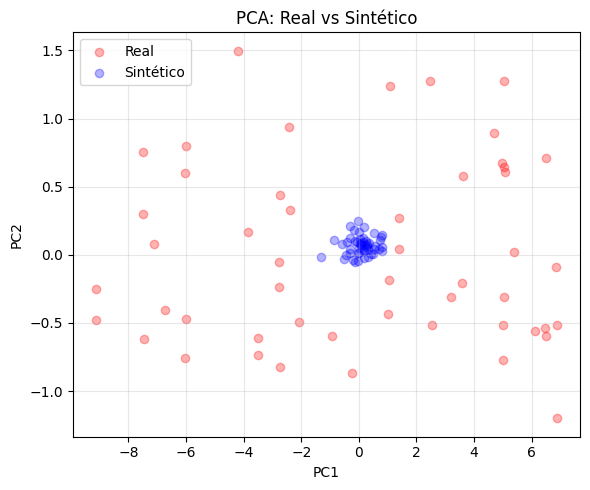

🌀 Ejecutando t-SNE (puede tardar unos segundos)...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...


c:\Users\Dario\Desktop\ThesiS JBP\jordan_venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 100 samples in 0.296s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 2.270417
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.421059
[t-SNE] KL divergence after 500 iterations: 0.575663


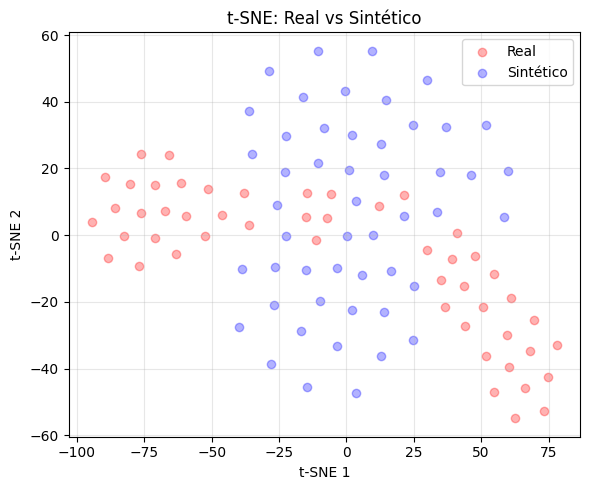

In [26]:
from generation_TGAN import safe_generation
import numpy as np

generated_data = safe_generation(model, num_samples=50, batch_size=64)

n_vis = 5000  # target

n_real = min(n_vis, len(ori_data))
n_fake = min(n_vis, len(generated_data))

idx_real = np.random.choice(len(ori_data), n_real, replace=False)
idx_fake = np.random.choice(len(generated_data), n_fake, replace=False)

ori_vis = [ori_data[i] for i in idx_real]
gen_vis = [generated_data[i] for i in idx_fake]

from visualization_TGAN import visualization

visualization(ori_vis, gen_vis, 'pca')
visualization(ori_vis, gen_vis, 'tsne')




In [5]:

from options_TGAN import Options
from lib.TimeGAN import TimeGAN

# 1. Options
opt = Options().parse()


opt.print_freq = 1    # imprime cada iteración

# 2. Set paper-style hyperparameters
opt.lr_g = 1e-4     # LR para el generador
opt.lr_d = 1e-4    # LR para el discriminador
opt.lr_e = 1e-3     # encoder
opt.lr_r = 1e-3     # recovery
opt.lr_s = 1e-3     # supervisor


opt.beta1 = 0.5

opt.batch_size = 64
opt.iteration = 100

opt.hidden_dim = 128   # muy importante
opt.num_layer = 3

opt.n_critic = 5      # OK
opt.gp_lambda = 10   # OK
opt.name = "TimeGAN_real_paper_settings"

opt.w_g    = 1.0   # antes 80
opt.w_e0   = 1.0   # antes 10
opt.w_es   = 1.0   # antes 0.1, lo dejamos en la misma escala
opt.w_gamma = 1.0  # este se puede mantener


# 3. Create model
model = TimeGAN(opt, ori_data)

# 4. Train
model.train()

[INFO] Adjusted opt.z_dim to match data feature size: 6
=== PRETRAINING: Embedding + Recovery ===
[DEBUG] Loss this iteration: 0.106459
[ER] Iter 0/100 | ER Loss = 0.106459
[DEBUG] Loss this iteration: 0.176284
[ER] Iter 1/100 | ER Loss = 0.176284
[DEBUG] Loss this iteration: 0.096004
[ER] Iter 2/100 | ER Loss = 0.096004
[DEBUG] Loss this iteration: 0.081483
[ER] Iter 3/100 | ER Loss = 0.081483
[DEBUG] Loss this iteration: 0.095169
[ER] Iter 4/100 | ER Loss = 0.095169
[DEBUG] Loss this iteration: 0.076242
[ER] Iter 5/100 | ER Loss = 0.076242
[DEBUG] Loss this iteration: 0.070849
[ER] Iter 6/100 | ER Loss = 0.070849
[DEBUG] Loss this iteration: 0.062370
[ER] Iter 7/100 | ER Loss = 0.062370
[DEBUG] Loss this iteration: 0.069374
[ER] Iter 8/100 | ER Loss = 0.069374
[DEBUG] Loss this iteration: 0.061826
[ER] Iter 9/100 | ER Loss = 0.061826
[DEBUG] Loss this iteration: 0.051796
[ER] Iter 10/100 | ER Loss = 0.051796
[DEBUG] Loss this iteration: 0.029811
[ER] Iter 11/100 | ER Loss = 0.029811


🧩 Generating 50 samples in 1 batches of 64...
  ✅ Batch 1/1 generated (50 samples)


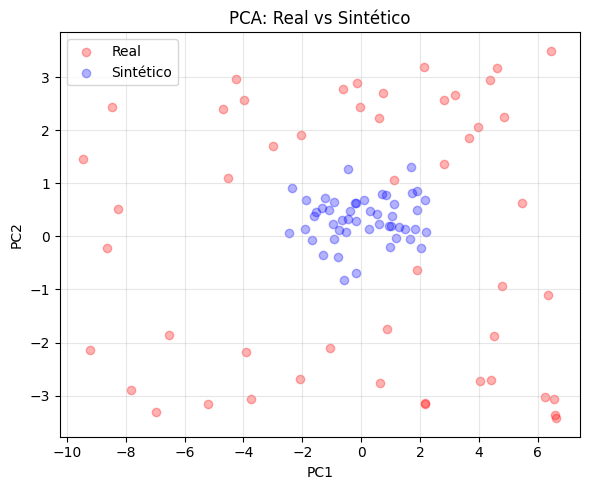

🌀 Ejecutando t-SNE (puede tardar unos segundos)...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 2.861610
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.412167
[t-SNE] KL divergence after 500 iterations: 0.380059


c:\Users\Dario\Desktop\ThesiS JBP\jordan_venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


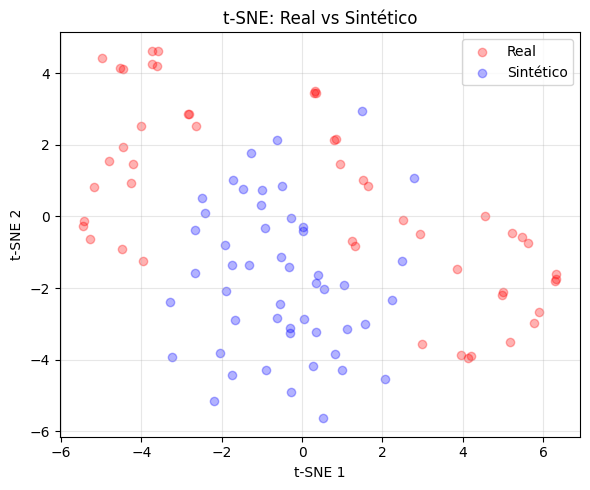

In [6]:
from generation_TGAN import safe_generation
import numpy as np

generated_data = safe_generation(model, num_samples=50, batch_size=64)

n_vis = 5000  # target

n_real = min(n_vis, len(ori_data))
n_fake = min(n_vis, len(generated_data))

idx_real = np.random.choice(len(ori_data), n_real, replace=False)
idx_fake = np.random.choice(len(generated_data), n_fake, replace=False)

ori_vis = [ori_data[i] for i in idx_real]
gen_vis = [generated_data[i] for i in idx_fake]

from visualization_TGAN import visualization

visualization(ori_vis, gen_vis, 'pca')
visualization(ori_vis, gen_vis, 'tsne')




Add DROPOUT to all GRU

In [7]:

from options_TGAN import Options
from lib.TimeGAN import TimeGAN

# 1. Options
opt = Options().parse()


opt.print_freq = 1    # imprime cada iteración

# 2. Set paper-style hyperparameters
opt.lr_g = 1e-4     # LR para el generador
opt.lr_d = 5e-4    # LR para el discriminador
opt.lr_e = 1e-3     # encoder
opt.lr_r = 1e-3     # recovery
opt.lr_s = 1e-3     # supervisor


opt.beta1 = 0.5

opt.batch_size = 64
opt.iteration = 100

opt.hidden_dim = 24   # muy importante
opt.num_layer = 3

opt.n_critic = 5      # OK
opt.gp_lambda = 10   # OK
opt.name = "TimeGAN_real_paper_settings"

opt.w_g    = 1.0   # antes 80
opt.w_e0   = 1.0   # antes 10
opt.w_es   = 1.0   # antes 0.1, lo dejamos en la misma escala
opt.w_gamma = 1.0  # este se puede mantener


# 3. Create model
model = TimeGAN(opt, ori_data)

# 4. Train
model.train()

[INFO] Adjusted opt.z_dim to match data feature size: 6
=== PRETRAINING: Embedding + Recovery ===
[DEBUG] Loss this iteration: 0.074398
[ER] Iter 0/100 | ER Loss = 0.074398
[DEBUG] Loss this iteration: 0.039196
[ER] Iter 1/100 | ER Loss = 0.039196
[DEBUG] Loss this iteration: 0.033539
[ER] Iter 2/100 | ER Loss = 0.033539
[DEBUG] Loss this iteration: 0.030460
[ER] Iter 3/100 | ER Loss = 0.030460
[DEBUG] Loss this iteration: 0.029202
[ER] Iter 4/100 | ER Loss = 0.029202
[DEBUG] Loss this iteration: 0.024491
[ER] Iter 5/100 | ER Loss = 0.024491
[DEBUG] Loss this iteration: 0.023647
[ER] Iter 6/100 | ER Loss = 0.023647
[DEBUG] Loss this iteration: 0.023712
[ER] Iter 7/100 | ER Loss = 0.023712
[DEBUG] Loss this iteration: 0.021071
[ER] Iter 8/100 | ER Loss = 0.021071
[DEBUG] Loss this iteration: 0.018824
[ER] Iter 9/100 | ER Loss = 0.018824
[DEBUG] Loss this iteration: 0.018419
[ER] Iter 10/100 | ER Loss = 0.018419
[DEBUG] Loss this iteration: 0.018265
[ER] Iter 11/100 | ER Loss = 0.018265


🧩 Generating 50 samples in 1 batches of 64...
  ✅ Batch 1/1 generated (50 samples)


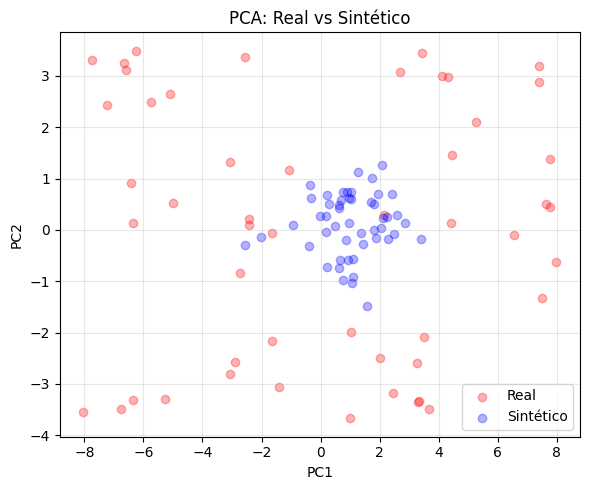

🌀 Ejecutando t-SNE (puede tardar unos segundos)...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.038726
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.900879
[t-SNE] KL divergence after 500 iterations: 0.395008


c:\Users\Dario\Desktop\ThesiS JBP\jordan_venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


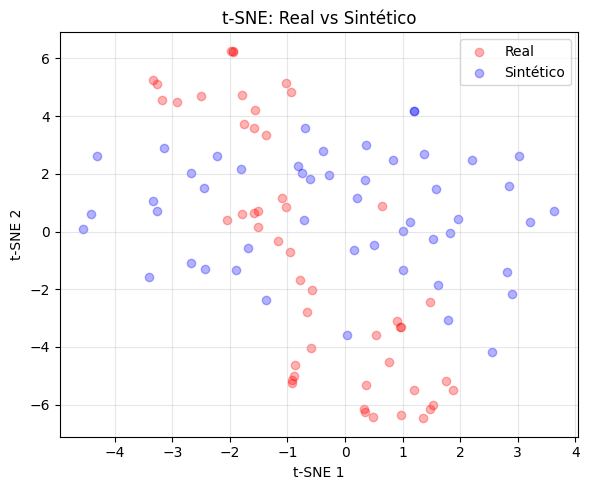

In [8]:
from generation_TGAN import safe_generation
import numpy as np

generated_data = safe_generation(model, num_samples=50, batch_size=64)

n_vis = 5000  # target

n_real = min(n_vis, len(ori_data))
n_fake = min(n_vis, len(generated_data))

idx_real = np.random.choice(len(ori_data), n_real, replace=False)
idx_fake = np.random.choice(len(generated_data), n_fake, replace=False)

ori_vis = [ori_data[i] for i in idx_real]
gen_vis = [generated_data[i] for i in idx_fake]

from visualization_TGAN import visualization

visualization(ori_vis, gen_vis, 'pca')
visualization(ori_vis, gen_vis, 'tsne')

In [9]:

from options_TGAN import Options
from lib.TimeGAN import TimeGAN

# 1. Options
opt = Options().parse()


opt.print_freq = 1    # imprime cada iteración

# 2. Set paper-style hyperparameters
opt.lr_g = 1e-4     # LR para el generador
opt.lr_d = 5e-4    # LR para el discriminador
opt.lr_e = 1e-3     # encoder
opt.lr_r = 1e-3     # recovery
opt.lr_s = 1e-3     # supervisor


opt.beta1 = 0.5

opt.batch_size = 64
opt.iteration = 100

opt.hidden_dim = 24   # muy importante
opt.num_layer = 3

opt.n_critic = 5      # OK
opt.gp_lambda = 10   # OK
opt.name = "TimeGAN_real_paper_settings"

opt.w_g    = 1.0   # antes 80
opt.w_e0   = 1.0   # antes 10
opt.w_es   = 1.0   # antes 0.1, lo dejamos en la misma escala
opt.w_gamma = 1.0  # este se puede mantener


# 3. Create model
model = TimeGAN(opt, ori_data)

# 4. Train
model.train()

[INFO] Adjusted opt.z_dim to match data feature size: 6
=== PRETRAINING: Embedding + Recovery ===
[DEBUG] Loss this iteration: 0.078286
[ER] Iter 0/100 | ER Loss = 0.078286
[DEBUG] Loss this iteration: 0.050160
[ER] Iter 1/100 | ER Loss = 0.050160
[DEBUG] Loss this iteration: 0.036183
[ER] Iter 2/100 | ER Loss = 0.036183
[DEBUG] Loss this iteration: 0.029406
[ER] Iter 3/100 | ER Loss = 0.029406
[DEBUG] Loss this iteration: 0.027737
[ER] Iter 4/100 | ER Loss = 0.027737
[DEBUG] Loss this iteration: 0.023368
[ER] Iter 5/100 | ER Loss = 0.023368
[DEBUG] Loss this iteration: 0.021740
[ER] Iter 6/100 | ER Loss = 0.021740
[DEBUG] Loss this iteration: 0.020324
[ER] Iter 7/100 | ER Loss = 0.020324
[DEBUG] Loss this iteration: 0.020558
[ER] Iter 8/100 | ER Loss = 0.020558
[DEBUG] Loss this iteration: 0.018921
[ER] Iter 9/100 | ER Loss = 0.018921
[DEBUG] Loss this iteration: 0.017824
[ER] Iter 10/100 | ER Loss = 0.017824
[DEBUG] Loss this iteration: 0.017215
[ER] Iter 11/100 | ER Loss = 0.017215


🧩 Generating 50 samples in 1 batches of 64...
  ✅ Batch 1/1 generated (50 samples)


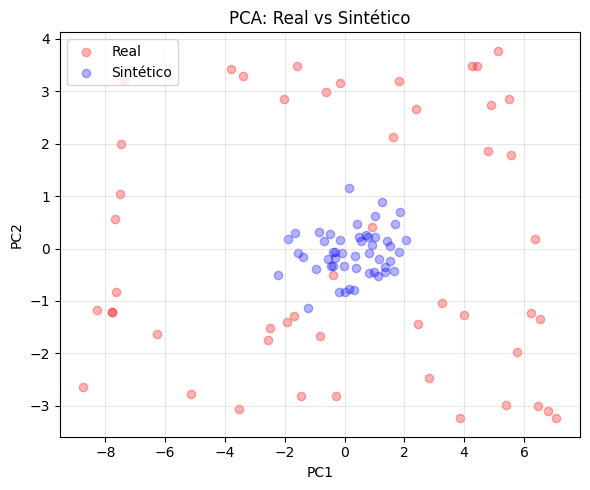

🌀 Ejecutando t-SNE (puede tardar unos segundos)...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.133704
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.535797
[t-SNE] KL divergence after 500 iterations: 0.442724


c:\Users\Dario\Desktop\ThesiS JBP\jordan_venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


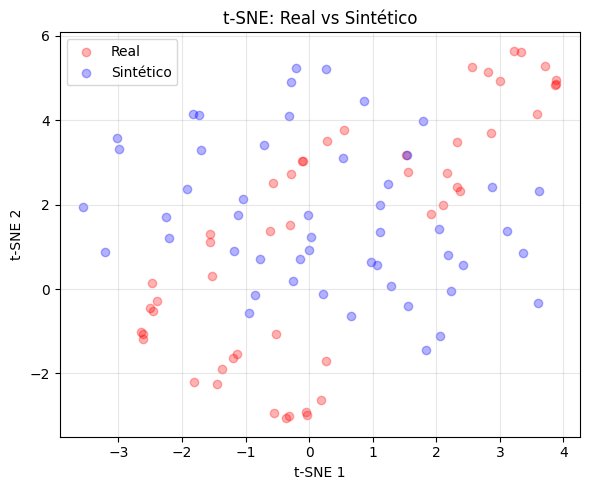

In [10]:
from generation_TGAN import safe_generation
import numpy as np

generated_data = safe_generation(model, num_samples=50, batch_size=64)

n_vis = 5000  # target

n_real = min(n_vis, len(ori_data))
n_fake = min(n_vis, len(generated_data))

idx_real = np.random.choice(len(ori_data), n_real, replace=False)
idx_fake = np.random.choice(len(generated_data), n_fake, replace=False)

ori_vis = [ori_data[i] for i in idx_real]
gen_vis = [generated_data[i] for i in idx_fake]

from visualization_TGAN import visualization

visualization(ori_vis, gen_vis, 'pca')
visualization(ori_vis, gen_vis, 'tsne')

In [11]:

from options_TGAN import Options
from lib.TimeGAN import TimeGAN

# 1. Options
opt = Options().parse()


opt.print_freq = 1    # imprime cada iteración

# 2. Set paper-style hyperparameters
opt.lr_g = 1e-4     # LR para el generador
opt.lr_d = 5e-4    # LR para el discriminador
opt.lr_e = 1e-3     # encoder
opt.lr_r = 1e-3     # recovery
opt.lr_s = 1e-3     # supervisor


opt.beta1 = 0.5

opt.batch_size = 64
opt.iteration = 100

opt.hidden_dim = 24   # muy importante
opt.num_layer = 3

opt.n_critic = 5      # OK
opt.gp_lambda = 10   # OK
opt.name = "TimeGAN_real_paper_settings"

opt.w_g    = 1.0   # antes 80
opt.w_e0   = 1.0   # antes 10
opt.w_es   = 1.0   # antes 0.1, lo dejamos en la misma escala
opt.w_gamma = 1.0  # este se puede mantener


# 3. Create model
model = TimeGAN(opt, ori_data)

# 4. Train
model.train()

[INFO] Adjusted opt.z_dim to match data feature size: 6
=== PRETRAINING: Embedding + Recovery ===
[DEBUG] Loss this iteration: 0.142745
[ER] Iter 0/100 | ER Loss = 0.142745
[DEBUG] Loss this iteration: 0.090526
[ER] Iter 1/100 | ER Loss = 0.090526
[DEBUG] Loss this iteration: 0.060750
[ER] Iter 2/100 | ER Loss = 0.060750
[DEBUG] Loss this iteration: 0.039043
[ER] Iter 3/100 | ER Loss = 0.039043
[DEBUG] Loss this iteration: 0.033010
[ER] Iter 4/100 | ER Loss = 0.033010
[DEBUG] Loss this iteration: 0.030426
[ER] Iter 5/100 | ER Loss = 0.030426
[DEBUG] Loss this iteration: 0.026473
[ER] Iter 6/100 | ER Loss = 0.026473
[DEBUG] Loss this iteration: 0.024858
[ER] Iter 7/100 | ER Loss = 0.024858
[DEBUG] Loss this iteration: 0.022171
[ER] Iter 8/100 | ER Loss = 0.022171
[DEBUG] Loss this iteration: 0.022156
[ER] Iter 9/100 | ER Loss = 0.022156
[DEBUG] Loss this iteration: 0.021537
[ER] Iter 10/100 | ER Loss = 0.021537
[DEBUG] Loss this iteration: 0.021122
[ER] Iter 11/100 | ER Loss = 0.021122


🧩 Generating 50 samples in 1 batches of 64...
  ✅ Batch 1/1 generated (50 samples)


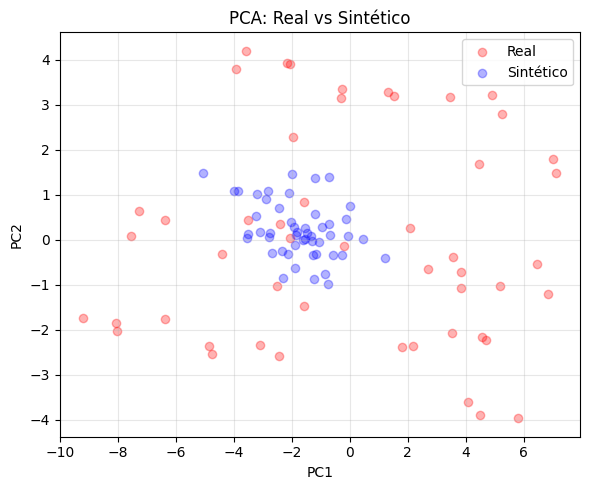

🌀 Ejecutando t-SNE (puede tardar unos segundos)...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.083305
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.208420
[t-SNE] KL divergence after 500 iterations: 0.455541


c:\Users\Dario\Desktop\ThesiS JBP\jordan_venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


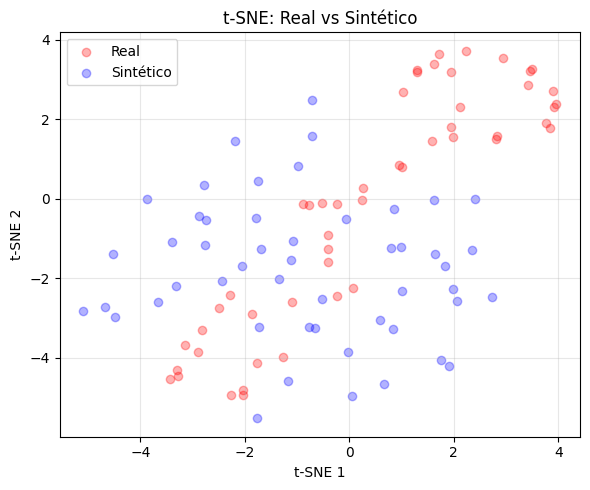

In [23]:
from generation_TGAN import safe_generation
import numpy as np

generated_data = safe_generation(model, num_samples=50, batch_size=64)

n_vis = 5000  # target

n_real = min(n_vis, len(ori_data))
n_fake = min(n_vis, len(generated_data))

idx_real = np.random.choice(len(ori_data), n_real, replace=False)
idx_fake = np.random.choice(len(generated_data), n_fake, replace=False)

ori_vis = [ori_data[i] for i in idx_real]
gen_vis = [generated_data[i] for i in idx_fake]

from visualization_TGAN import visualization

visualization(ori_vis, gen_vis, 'pca')
visualization(ori_vis, gen_vis, 'tsne')

Not longer use the shceduler delete it

In [15]:

from options_TGAN import Options
from lib.TimeGAN import TimeGAN

# 1. Options
opt = Options().parse()


opt.print_freq = 1    # imprime cada iteración

# 2. Set paper-style hyperparameters
opt.lr_g = 1e-4     # LR para el generador
opt.lr_d = 5e-4    # LR para el discriminador
opt.lr_e = 1e-3     # encoder
opt.lr_r = 1e-3     # recovery
opt.lr_s = 1e-3     # supervisor


opt.beta1 = 0.5

opt.batch_size = 64
opt.iteration = 100

opt.hidden_dim = 32   # muy importante
opt.num_layer = 4

opt.n_critic = 5      # OK
opt.gp_lambda = 10   # OK
opt.name = "TimeGAN_real_paper_settings"

opt.w_g    = 1.0   # antes 80
opt.w_e0   = 1.0   # antes 10
opt.w_es   = 1.0   # antes 0.1, lo dejamos en la misma escala
opt.w_gamma = 1.0  # este se puede mantener


# 3. Create model
model = TimeGAN(opt, ori_data)

# 4. Train
model.train()

[INFO] Adjusted opt.z_dim to match data feature size: 6
=== PRETRAINING: Embedding + Recovery ===
[DEBUG] Loss this iteration: 0.079538
[ER] Iter 0/100 | ER Loss = 0.079538
[DEBUG] Loss this iteration: 0.057751
[ER] Iter 1/100 | ER Loss = 0.057751
[DEBUG] Loss this iteration: 0.042753
[ER] Iter 2/100 | ER Loss = 0.042753
[DEBUG] Loss this iteration: 0.033504
[ER] Iter 3/100 | ER Loss = 0.033504
[DEBUG] Loss this iteration: 0.030957
[ER] Iter 4/100 | ER Loss = 0.030957
[DEBUG] Loss this iteration: 0.030936
[ER] Iter 5/100 | ER Loss = 0.030936
[DEBUG] Loss this iteration: 0.026181
[ER] Iter 6/100 | ER Loss = 0.026181
[DEBUG] Loss this iteration: 0.024143
[ER] Iter 7/100 | ER Loss = 0.024143
[DEBUG] Loss this iteration: 0.021214
[ER] Iter 8/100 | ER Loss = 0.021214
[DEBUG] Loss this iteration: 0.018894
[ER] Iter 9/100 | ER Loss = 0.018894
[DEBUG] Loss this iteration: 0.017598
[ER] Iter 10/100 | ER Loss = 0.017598
[DEBUG] Loss this iteration: 0.016567
[ER] Iter 11/100 | ER Loss = 0.016567


🧩 Generating 50 samples in 1 batches of 64...
  ✅ Batch 1/1 generated (50 samples)


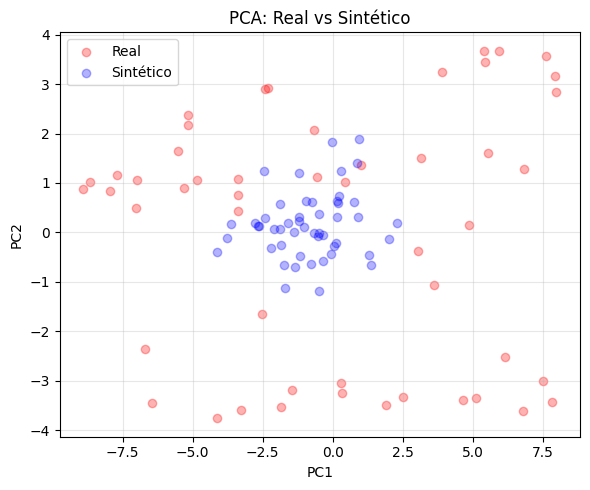

🌀 Ejecutando t-SNE (puede tardar unos segundos)...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.184127
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.934040


c:\Users\Dario\Desktop\ThesiS JBP\jordan_venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] KL divergence after 500 iterations: 0.423455


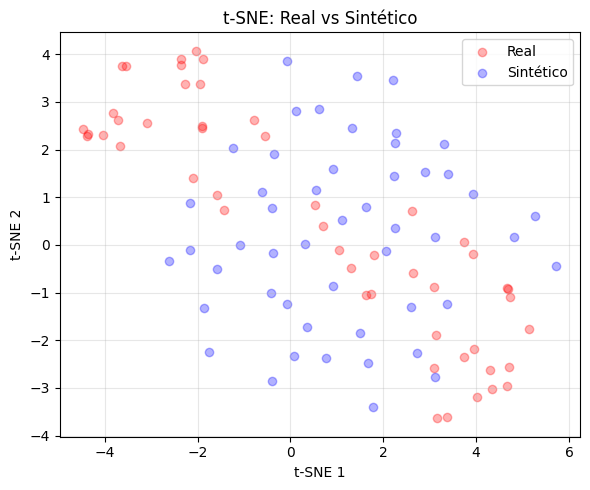

In [20]:
from generation_TGAN import safe_generation
import numpy as np

generated_data = safe_generation(model, num_samples=50, batch_size=64)

n_vis = 5000  # target

n_real = min(n_vis, len(ori_data))
n_fake = min(n_vis, len(generated_data))

idx_real = np.random.choice(len(ori_data), n_real, replace=False)
idx_fake = np.random.choice(len(generated_data), n_fake, replace=False)

ori_vis = [ori_data[i] for i in idx_real]
gen_vis = [generated_data[i] for i in idx_fake]

from visualization_TGAN import visualization

visualization(ori_vis, gen_vis, 'pca')
visualization(ori_vis, gen_vis, 'tsne')

In [25]:

from options_TGAN import Options
from lib.TimeGAN import TimeGAN

# 1. Options
opt = Options().parse()


opt.print_freq = 100    # imprime cada iteración

# 2. Set paper-style hyperparameters
opt.lr_g = 1e-4     # LR para el generador
opt.lr_d = 5e-4    # LR para el discriminador
opt.lr_e = 1e-3     # encoder
opt.lr_r = 1e-3     # recovery
opt.lr_s = 1e-3     # supervisor


opt.beta1 = 0.5

opt.batch_size = 64
opt.iteration = 2000

opt.hidden_dim = 32   # muy importante
opt.num_layer = 4

opt.n_critic = 5      # OK
opt.gp_lambda = 10   # OK
opt.name = "TimeGAN_real_paper_settings"

opt.w_g    = 1.0   # antes 80
opt.w_e0   = 1.0   # antes 10
opt.w_es   = 1.0   # antes 0.1, lo dejamos en la misma escala
opt.w_gamma = 1.0  # este se puede mantener


# 3. Create model
model = TimeGAN(opt, ori_data)

# 4. Train
model.train()

[INFO] Adjusted opt.z_dim to match data feature size: 6
=== PRETRAINING: Embedding + Recovery ===
[DEBUG] Loss this iteration: 0.056106
[ER] Iter 0/2000 | ER Loss = 0.056106
[DEBUG] Loss this iteration: 0.040016
[DEBUG] Loss this iteration: 0.032977
[DEBUG] Loss this iteration: 0.030393
[DEBUG] Loss this iteration: 0.025725
[DEBUG] Loss this iteration: 0.024449
[DEBUG] Loss this iteration: 0.024507
[DEBUG] Loss this iteration: 0.022201
[DEBUG] Loss this iteration: 0.020002
[DEBUG] Loss this iteration: 0.019266
[DEBUG] Loss this iteration: 0.018268
[DEBUG] Loss this iteration: 0.017160
[DEBUG] Loss this iteration: 0.015959
[DEBUG] Loss this iteration: 0.015726
[DEBUG] Loss this iteration: 0.015076
[DEBUG] Loss this iteration: 0.015434
[DEBUG] Loss this iteration: 0.015982
[DEBUG] Loss this iteration: 0.016256
[DEBUG] Loss this iteration: 0.016351
[DEBUG] Loss this iteration: 0.016406
[DEBUG] Loss this iteration: 0.013837
[DEBUG] Loss this iteration: 0.013343
[DEBUG] Loss this iteration:

🧩 Generating 50 samples in 1 batches of 64...
  ✅ Batch 1/1 generated (50 samples)


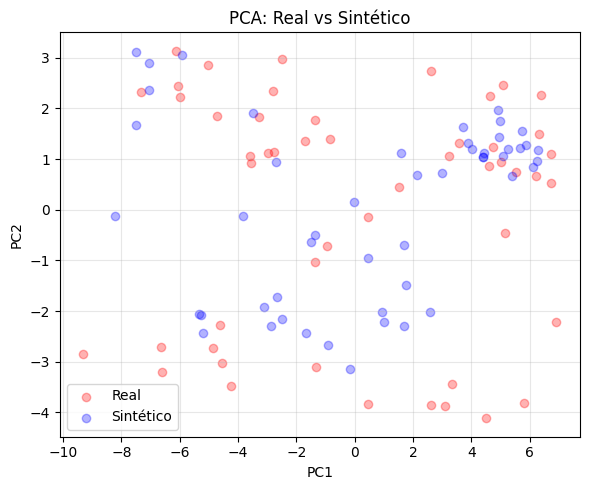

🌀 Ejecutando t-SNE (puede tardar unos segundos)...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.809751
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.668964
[t-SNE] KL divergence after 500 iterations: 0.135138


c:\Users\Dario\Desktop\ThesiS JBP\jordan_venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


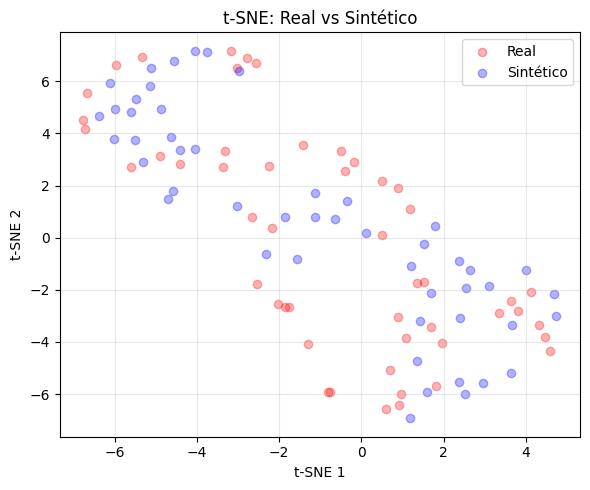

In [26]:
from generation_TGAN import safe_generation
import numpy as np

generated_data = safe_generation(model, num_samples=50, batch_size=64)

n_vis = 5000  # target

n_real = min(n_vis, len(ori_data))
n_fake = min(n_vis, len(generated_data))

idx_real = np.random.choice(len(ori_data), n_real, replace=False)
idx_fake = np.random.choice(len(generated_data), n_fake, replace=False)

ori_vis = [ori_data[i] for i in idx_real]
gen_vis = [generated_data[i] for i in idx_fake]

from visualization_TGAN import visualization

visualization(ori_vis, gen_vis, 'pca')
visualization(ori_vis, gen_vis, 'tsne')

In [31]:

# fropout from 0.5 to 0.2
#2 layers

from options_TGAN import Options
from lib.TimeGAN import TimeGAN

# 1. Options
opt = Options().parse()


opt.print_freq = 100    # imprime cada iteración

# 2. Set paper-style hyperparameters
opt.lr_g = 1e-4     # LR para el generador
opt.lr_d = 1e-4    # LR para el discriminador
opt.lr_e = 1e-4     # encoder
opt.lr_r = 1e-4     # recovery
opt.lr_s = 1e-4     # supervisor


opt.beta1 = 0.5

opt.batch_size = 64
opt.iteration = 1000

opt.hidden_dim = 24   # muy importante
opt.num_layer = 2

opt.n_critic = 2      # OK
opt.gp_lambda = 10   # OK
opt.name = "TimeGAN_real_paper_settings"

opt.w_g    = 10   # antes 80
opt.w_e0   = 10   # antes 10
opt.w_es   = 1.0   # antes 0.1, lo dejamos en la misma escala
opt.w_gamma = 1.0  # este se puede mantener


# 3. Create model
model = TimeGAN(opt, ori_data)

# 4. Train
model.train()

[INFO] Adjusted opt.z_dim to match data feature size: 6
=== PRETRAINING: Embedding + Recovery ===
[DEBUG] Loss this iteration: 0.095405
[ER] Iter 0/1000 | ER Loss = 0.095405
[DEBUG] Loss this iteration: 0.092593
[DEBUG] Loss this iteration: 0.091741
[DEBUG] Loss this iteration: 0.086726
[DEBUG] Loss this iteration: 0.088000
[DEBUG] Loss this iteration: 0.087739
[DEBUG] Loss this iteration: 0.084177
[DEBUG] Loss this iteration: 0.081114
[DEBUG] Loss this iteration: 0.078089
[DEBUG] Loss this iteration: 0.074772
[DEBUG] Loss this iteration: 0.074172
[DEBUG] Loss this iteration: 0.069924
[DEBUG] Loss this iteration: 0.070849
[DEBUG] Loss this iteration: 0.067750
[DEBUG] Loss this iteration: 0.065019
[DEBUG] Loss this iteration: 0.062213
[DEBUG] Loss this iteration: 0.057024
[DEBUG] Loss this iteration: 0.055532
[DEBUG] Loss this iteration: 0.053319
[DEBUG] Loss this iteration: 0.049653
[DEBUG] Loss this iteration: 0.047657
[DEBUG] Loss this iteration: 0.047296
[DEBUG] Loss this iteration:

🧩 Generating 50 samples in 1 batches of 64...
  ✅ Batch 1/1 generated (50 samples)


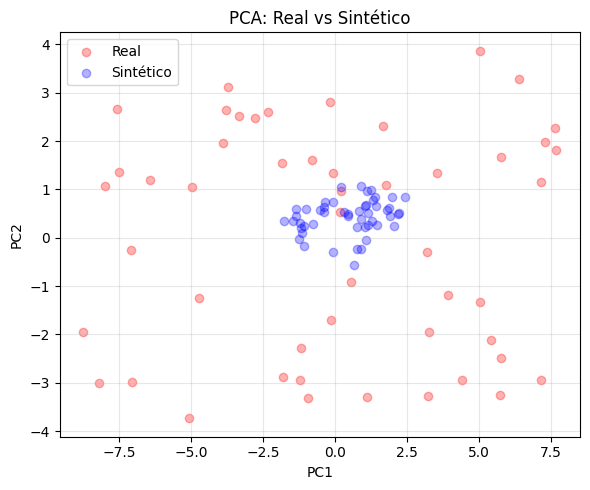

🌀 Ejecutando t-SNE (puede tardar unos segundos)...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.148064
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.288376


c:\Users\Dario\Desktop\ThesiS JBP\jordan_venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] KL divergence after 500 iterations: 0.443137


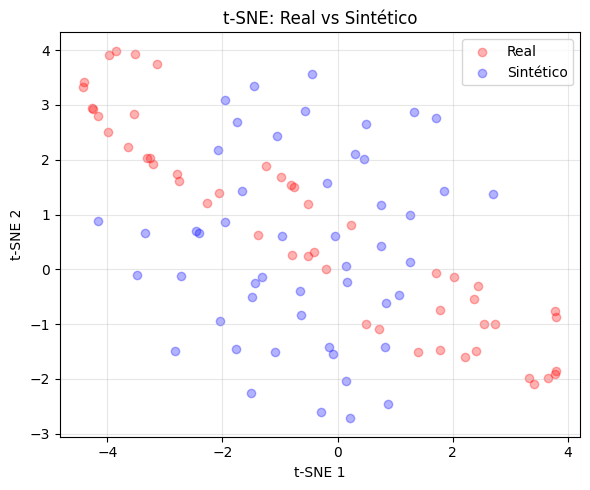

In [32]:
from generation_TGAN import safe_generation
import numpy as np

generated_data = safe_generation(model, num_samples=50, batch_size=64)

n_vis = 5000  # target

n_real = min(n_vis, len(ori_data))
n_fake = min(n_vis, len(generated_data))

idx_real = np.random.choice(len(ori_data), n_real, replace=False)
idx_fake = np.random.choice(len(generated_data), n_fake, replace=False)

ori_vis = [ori_data[i] for i in idx_real]
gen_vis = [generated_data[i] for i in idx_fake]

from visualization_TGAN import visualization

visualization(ori_vis, gen_vis, 'pca')
visualization(ori_vis, gen_vis, 'tsne')

In [33]:

# fropout from 0.5 to 0.2
#2 layers

from options_TGAN import Options
from lib.TimeGAN import TimeGAN

# 1. Options
opt = Options().parse()


opt.print_freq = 100    # imprime cada iteración

# 2. Set paper-style hyperparameters
opt.lr_g = 1e-4     # LR para el generador
opt.lr_d = 1e-4    # LR para el discriminador
opt.lr_e = 1e-4     # encoder
opt.lr_r = 1e-4     # recovery
opt.lr_s = 1e-4     # supervisor


opt.beta1 = 0.5

opt.batch_size = 64
opt.iteration = 1000

opt.hidden_dim = 24   # muy importante
opt.num_layer = 2

opt.n_critic = 2      # OK
opt.gp_lambda = 10   # OK
opt.name = "TimeGAN_real_paper_settings"

opt.w_g    = 10   # antes 80
opt.w_e0   = 10   # antes 10
opt.w_es   = 1.0   # antes 0.1, lo dejamos en la misma escala
opt.w_gamma = 1.0  # este se puede mantener


# 3. Create model
model = TimeGAN(opt, ori_data)

# 4. Train
model.train()

[INFO] Adjusted opt.z_dim to match data feature size: 6
=== PRETRAINING: Embedding + Recovery ===
[DEBUG] Loss this iteration: 0.070956
[ER] Iter 0/1000 | ER Loss = 0.070956
[DEBUG] Loss this iteration: 0.074277
[DEBUG] Loss this iteration: 0.082122
[DEBUG] Loss this iteration: 0.083963
[DEBUG] Loss this iteration: 0.078669
[DEBUG] Loss this iteration: 0.078673
[DEBUG] Loss this iteration: 0.069267
[DEBUG] Loss this iteration: 0.075648
[DEBUG] Loss this iteration: 0.072102
[DEBUG] Loss this iteration: 0.074755
[DEBUG] Loss this iteration: 0.069623
[DEBUG] Loss this iteration: 0.066976
[DEBUG] Loss this iteration: 0.069442
[DEBUG] Loss this iteration: 0.064978
[DEBUG] Loss this iteration: 0.064200
[DEBUG] Loss this iteration: 0.062048
[DEBUG] Loss this iteration: 0.058718
[DEBUG] Loss this iteration: 0.060705
[DEBUG] Loss this iteration: 0.056927
[DEBUG] Loss this iteration: 0.046744
[DEBUG] Loss this iteration: 0.058837
[DEBUG] Loss this iteration: 0.057001
[DEBUG] Loss this iteration:

🧩 Generating 50 samples in 1 batches of 64...
  ✅ Batch 1/1 generated (50 samples)


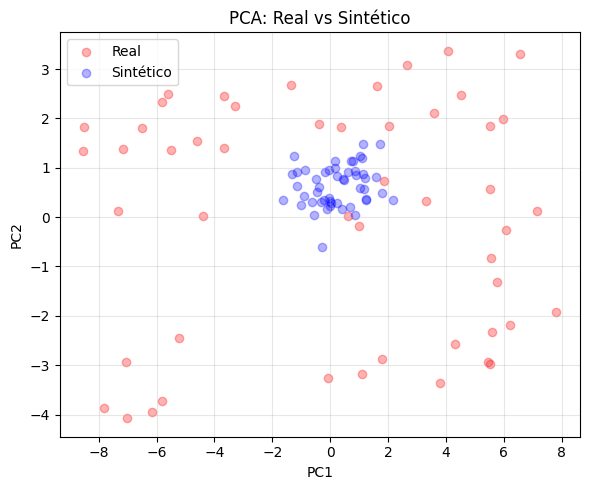

🌀 Ejecutando t-SNE (puede tardar unos segundos)...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.261248
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.011078
[t-SNE] KL divergence after 500 iterations: 0.434502


c:\Users\Dario\Desktop\ThesiS JBP\jordan_venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


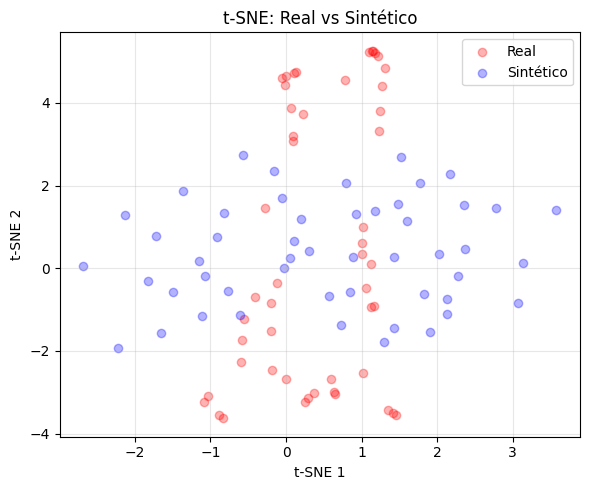

In [34]:
from generation_TGAN import safe_generation
import numpy as np

generated_data = safe_generation(model, num_samples=50, batch_size=64)

n_vis = 5000  # target

n_real = min(n_vis, len(ori_data))
n_fake = min(n_vis, len(generated_data))

idx_real = np.random.choice(len(ori_data), n_real, replace=False)
idx_fake = np.random.choice(len(generated_data), n_fake, replace=False)

ori_vis = [ori_data[i] for i in idx_real]
gen_vis = [generated_data[i] for i in idx_fake]

from visualization_TGAN import visualization

visualization(ori_vis, gen_vis, 'pca')
visualization(ori_vis, gen_vis, 'tsne')

In [ ]:

# fropout from 0.5 to 0.2
#2 layers

from options_TGAN import Options
from lib.TimeGAN import TimeGAN

# 1. Options
opt = Options().parse()


opt.print_freq = 100    # imprime cada iteración

# 2. Set paper-style hyperparameters
opt.lr_g = 1e-4     # LR para el generador
opt.lr_d = 1e-4    # LR para el discriminador
opt.lr_e = 1e-4     # encoder
opt.lr_r = 1e-4     # recovery
opt.lr_s = 1e-4     # supervisor


opt.beta1 = 0.5

opt.batch_size = 64
opt.iteration = 500

opt.hidden_dim = 24   # muy importante
opt.num_layer = 2

opt.n_critic = 5      # OK
opt.gp_lambda = 10   # OK
opt.name = "TimeGAN_real_paper_settings"

opt.w_g    = 10   # antes 80
opt.w_e0   = 10   # antes 10
opt.w_es   = 1.0   # antes 0.1, lo dejamos en la misma escala
opt.w_gamma = 1.0  # este se puede mantener


# 3. Create model
model = TimeGAN(opt, ori_data)

# 4. Train
model.train()

[INFO] Adjusted opt.z_dim to match data feature size: 6
=== PRETRAINING: Embedding + Recovery ===
[DEBUG] Loss this iteration: 0.143116
[ER] Iter 0/500 | ER Loss = 0.143116
[DEBUG] Loss this iteration: 0.144526
[DEBUG] Loss this iteration: 0.139400
[DEBUG] Loss this iteration: 0.137626
[DEBUG] Loss this iteration: 0.134455
[DEBUG] Loss this iteration: 0.129593
[DEBUG] Loss this iteration: 0.127222
[DEBUG] Loss this iteration: 0.124964
[DEBUG] Loss this iteration: 0.120717
[DEBUG] Loss this iteration: 0.115413
[DEBUG] Loss this iteration: 0.111597
[DEBUG] Loss this iteration: 0.108378
[DEBUG] Loss this iteration: 0.106097
[DEBUG] Loss this iteration: 0.100111
[DEBUG] Loss this iteration: 0.096737
[DEBUG] Loss this iteration: 0.091385
[DEBUG] Loss this iteration: 0.090269
[DEBUG] Loss this iteration: 0.089036
[DEBUG] Loss this iteration: 0.085173
[DEBUG] Loss this iteration: 0.080492
[DEBUG] Loss this iteration: 0.078593
[DEBUG] Loss this iteration: 0.076672
[DEBUG] Loss this iteration: 

🧩 Generating 50 samples in 1 batches of 64...
  ✅ Batch 1/1 generated (50 samples)


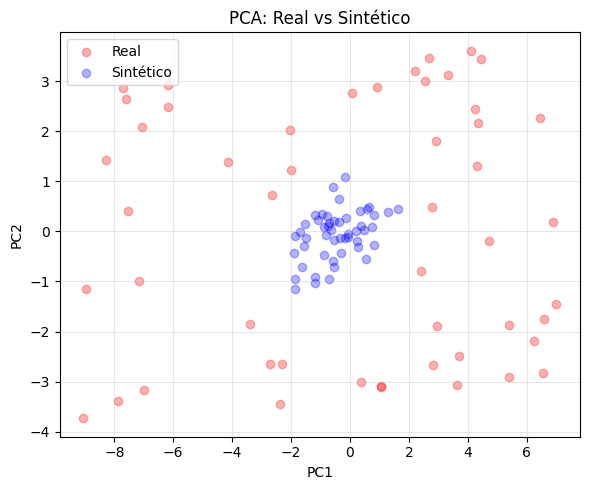

🌀 Ejecutando t-SNE (puede tardar unos segundos)...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.225712
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.270813
[t-SNE] KL divergence after 500 iterations: 0.553273


c:\Users\Dario\Desktop\ThesiS JBP\jordan_venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


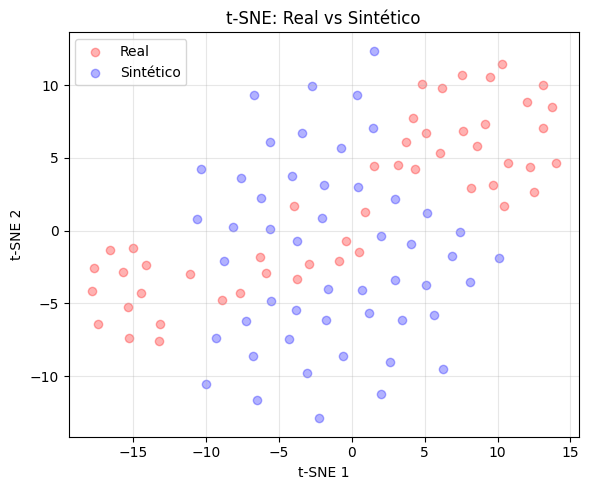

In [38]:
from generation_TGAN import safe_generation
import numpy as np

generated_data = safe_generation(model, num_samples=50, batch_size=64)

n_vis = 5000  # target

n_real = min(n_vis, len(ori_data))
n_fake = min(n_vis, len(generated_data))

idx_real = np.random.choice(len(ori_data), n_real, replace=False)
idx_fake = np.random.choice(len(generated_data), n_fake, replace=False)

ori_vis = [ori_data[i] for i in idx_real]
gen_vis = [generated_data[i] for i in idx_fake]

from visualization_TGAN import visualization

visualization(ori_vis, gen_vis, 'pca')
visualization(ori_vis, gen_vis, 'tsne')

In [43]:

# fropout from 0.5 to 0.2
#2 layers

from options_TGAN import Options
from lib.TimeGAN import TimeGAN

# 1. Options
opt = Options().parse()


opt.print_freq = 100    # imprime cada iteración

# 2. Set paper-style hyperparameters
opt.lr_g = 1e-4     # LR para el generador
opt.lr_d = 5e-4    # LR para el discriminador
opt.lr_e = 1e-3     # encoder
opt.lr_r = 1e-3     # recovery
opt.lr_s = 1e-3     # supervisor


opt.beta1 = 0.5

opt.batch_size = 64
opt.iteration = 400

opt.hidden_dim = 32   # muy importante
opt.num_layer = 4

opt.n_critic = 5      # OK
opt.gp_lambda = 10   # OK
opt.name = "TimeGAN_real_paper_settings"

opt.w_g    = 1.0   # 1
opt.w_e0   = 1.0   # 1
opt.w_es   = 1.0   # antes 0.1, lo dejamos en la misma escala
opt.w_gamma = 1.0  # este se puede mantener


# 3. Create model
model = TimeGAN(opt, ori_data)

# 4. Train
model.train()


[INFO] Adjusted opt.z_dim to match data feature size: 6
=== PRETRAINING: Embedding + Recovery ===
[DEBUG] Loss this iteration: 0.170454
[ER] Iter 0/400 | ER Loss = 0.170454
[DEBUG] Loss this iteration: 0.085752
[DEBUG] Loss this iteration: 0.050354
[DEBUG] Loss this iteration: 0.037241
[DEBUG] Loss this iteration: 0.029962
[DEBUG] Loss this iteration: 0.025086
[DEBUG] Loss this iteration: 0.022312
[DEBUG] Loss this iteration: 0.019990
[DEBUG] Loss this iteration: 0.020631
[DEBUG] Loss this iteration: 0.019406
[DEBUG] Loss this iteration: 0.020282
[DEBUG] Loss this iteration: 0.020569
[DEBUG] Loss this iteration: 0.019114
[DEBUG] Loss this iteration: 0.015698
[DEBUG] Loss this iteration: 0.015880
[DEBUG] Loss this iteration: 0.015864
[DEBUG] Loss this iteration: 0.017621
[DEBUG] Loss this iteration: 0.017516
[DEBUG] Loss this iteration: 0.017337
[DEBUG] Loss this iteration: 0.014554
[DEBUG] Loss this iteration: 0.013178
[DEBUG] Loss this iteration: 0.012476
[DEBUG] Loss this iteration: 

🧩 Generating 50 samples in 1 batches of 64...
  ✅ Batch 1/1 generated (50 samples)


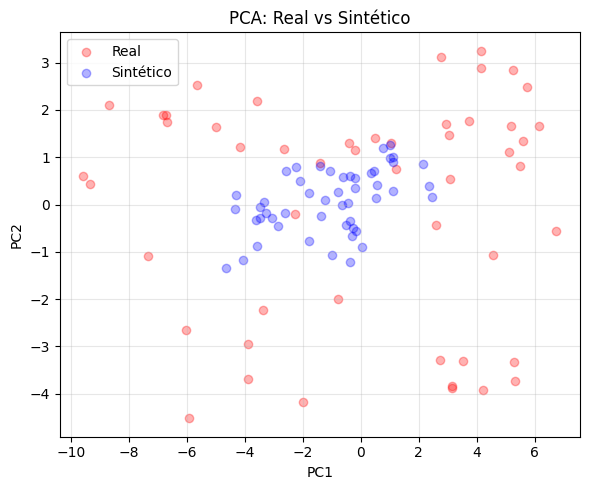

🌀 Ejecutando t-SNE (puede tardar unos segundos)...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.210460
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.084343


c:\Users\Dario\Desktop\ThesiS JBP\jordan_venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] KL divergence after 500 iterations: 0.381758


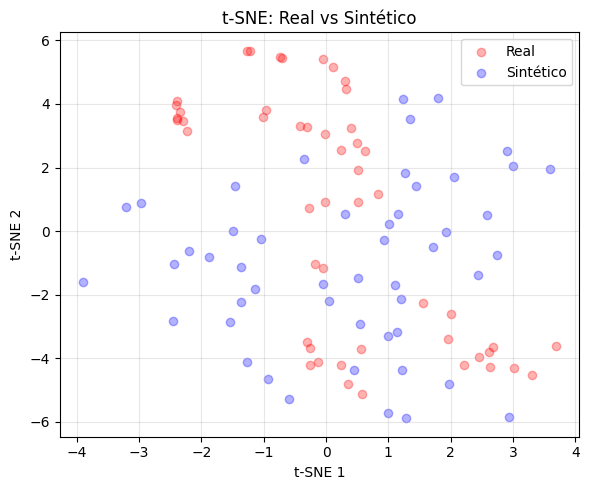

In [45]:
from generation_TGAN import safe_generation
import numpy as np

generated_data = safe_generation(model, num_samples=50, batch_size=64)

n_vis = 5000  # target

n_real = min(n_vis, len(ori_data))
n_fake = min(n_vis, len(generated_data))

idx_real = np.random.choice(len(ori_data), n_real, replace=False)
idx_fake = np.random.choice(len(generated_data), n_fake, replace=False)

ori_vis = [ori_data[i] for i in idx_real]
gen_vis = [generated_data[i] for i in idx_fake]

from visualization_TGAN import visualization

visualization(ori_vis, gen_vis, 'pca')
visualization(ori_vis, gen_vis, 'tsne')

In [46]:

# fropout from 0.5 to 0.2
#2 layers

from options_TGAN import Options
from lib.TimeGAN import TimeGAN

# 1. Options
opt = Options().parse()


opt.print_freq = 100    # imprime cada iteración

# 2. Set paper-style hyperparameters
opt.lr_g = 1e-4     # LR para el generador
opt.lr_d = 5e-4    # LR para el discriminador
opt.lr_e = 1e-3     # encoder
opt.lr_r = 1e-3     # recovery
opt.lr_s = 1e-3     # supervisor


opt.beta1 = 0.5

opt.batch_size = 64
opt.iteration = 2000

opt.hidden_dim = 32   # muy importante
opt.num_layer = 4

opt.n_critic = 4      # OK
opt.gp_lambda = 10   # OK
opt.name = "TimeGAN_real_paper_settings"

opt.w_g    = 1.0   # 1
opt.w_e0   = 1.0   # 1
opt.w_es   = 1.0   # antes 0.1, lo dejamos en la misma escala
opt.w_gamma = 1.0  # este se puede mantener


# 3. Create model
model = TimeGAN(opt, ori_data)

# 4. Train
model.train()


[INFO] Adjusted opt.z_dim to match data feature size: 6
=== PRETRAINING: Embedding + Recovery ===
[DEBUG] Loss this iteration: 0.153645
[ER] Iter 0/2000 | ER Loss = 0.153645
[DEBUG] Loss this iteration: 0.107438
[DEBUG] Loss this iteration: 0.071302
[DEBUG] Loss this iteration: 0.050899
[DEBUG] Loss this iteration: 0.040264
[DEBUG] Loss this iteration: 0.029894
[DEBUG] Loss this iteration: 0.027159
[DEBUG] Loss this iteration: 0.026490
[DEBUG] Loss this iteration: 0.023642
[DEBUG] Loss this iteration: 0.021890
[DEBUG] Loss this iteration: 0.021364
[DEBUG] Loss this iteration: 0.019243
[DEBUG] Loss this iteration: 0.018795
[DEBUG] Loss this iteration: 0.017289
[DEBUG] Loss this iteration: 0.016625
[DEBUG] Loss this iteration: 0.015936
[DEBUG] Loss this iteration: 0.022660
[DEBUG] Loss this iteration: 0.036749
[DEBUG] Loss this iteration: 0.015390
[DEBUG] Loss this iteration: 0.016477
[DEBUG] Loss this iteration: 0.013114
[DEBUG] Loss this iteration: 0.013673
[DEBUG] Loss this iteration:

🧩 Generating 50 samples in 1 batches of 64...
  ✅ Batch 1/1 generated (50 samples)


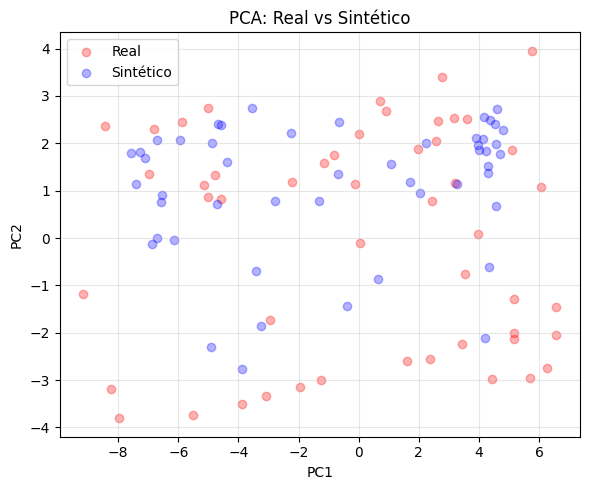

🌀 Ejecutando t-SNE (puede tardar unos segundos)...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.947363
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.038017
[t-SNE] KL divergence after 500 iterations: 0.184579


c:\Users\Dario\Desktop\ThesiS JBP\jordan_venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


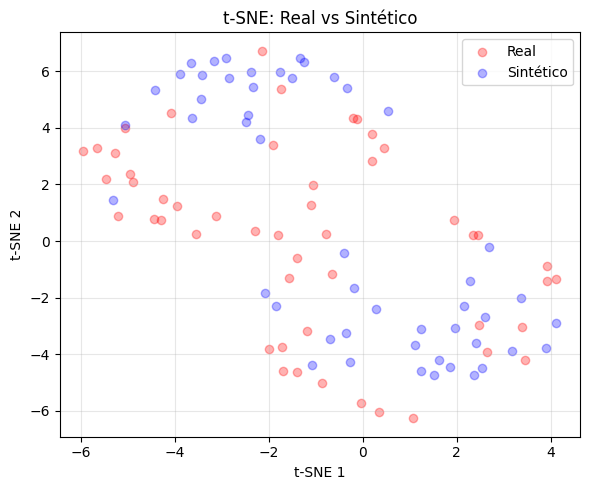

In [48]:
from generation_TGAN import safe_generation
import numpy as np

generated_data = safe_generation(model, num_samples=50, batch_size=64)

n_vis = 5000  # target

n_real = min(n_vis, len(ori_data))
n_fake = min(n_vis, len(generated_data))

idx_real = np.random.choice(len(ori_data), n_real, replace=False)
idx_fake = np.random.choice(len(generated_data), n_fake, replace=False)

ori_vis = [ori_data[i] for i in idx_real]
gen_vis = [generated_data[i] for i in idx_fake]

from visualization_TGAN import visualization

visualization(ori_vis, gen_vis, 'pca')
visualization(ori_vis, gen_vis, 'tsne')

In [5]:


from options_TGAN import Options
from lib.TimeGAN import TimeGAN

# 1. Options
opt = Options().parse()


opt.print_freq = 100    # imprime cada iteración

# 2. Set paper-style hyperparameters
opt.lr_g = 1e-4     # LR para el generador
opt.lr_d = 5e-4    # LR para el discriminador
opt.lr_e = 1e-3     # encoder
opt.lr_r = 1e-3     # recovery
opt.lr_s = 1e-3     # supervisor


opt.beta1 = 0.5

opt.batch_size = 24
opt.iteration = 4000

opt.hidden_dim = 24   # muy importante
opt.num_layer = 2

opt.n_critic = 4      # OK
opt.gp_lambda = 10   # OK
opt.name = "TimeGAN_real_paper_settings"

opt.w_g    = 1.0   # 1
opt.w_e0   = 1.0   # 1
opt.w_es   = 1.0   # antes 0.1, lo dejamos en la misma escala
opt.w_gamma = 1.0  # este se puede mantener


# 3. Create model
model = TimeGAN(opt, ori_data)

# 4. Train
model.train()



[INFO] Adjusted opt.z_dim to match data feature size: 6
=== PRETRAINING: Embedding + Recovery ===
[DEBUG] Loss this iteration: 0.110959
[ER] Iter 0/4000 | ER Loss = 0.110959
[DEBUG] Loss this iteration: 0.071050
[DEBUG] Loss this iteration: 0.056020
[DEBUG] Loss this iteration: 0.044850
[DEBUG] Loss this iteration: 0.032534
[DEBUG] Loss this iteration: 0.032637
[DEBUG] Loss this iteration: 0.029039
[DEBUG] Loss this iteration: 0.026406
[DEBUG] Loss this iteration: 0.026479
[DEBUG] Loss this iteration: 0.022327
[DEBUG] Loss this iteration: 0.022137
[DEBUG] Loss this iteration: 0.022037
[DEBUG] Loss this iteration: 0.019716
[DEBUG] Loss this iteration: 0.019776
[DEBUG] Loss this iteration: 0.018273
[DEBUG] Loss this iteration: 0.017585
[DEBUG] Loss this iteration: 0.017382
[DEBUG] Loss this iteration: 0.016894
[DEBUG] Loss this iteration: 0.016670
[DEBUG] Loss this iteration: 0.016329
[DEBUG] Loss this iteration: 0.016282
[DEBUG] Loss this iteration: 0.016462
[DEBUG] Loss this iteration:

🧩 Generating 50 samples in 1 batches of 64...
  ✅ Batch 1/1 generated (50 samples)


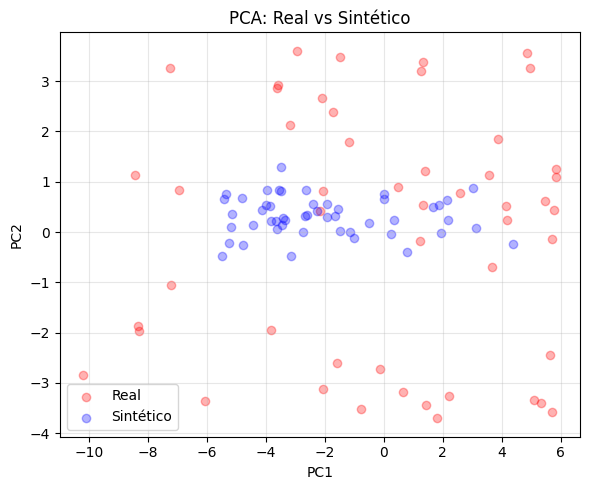

🌀 Ejecutando t-SNE (puede tardar unos segundos)...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...


c:\Users\Dario\Desktop\ThesiS JBP\jordan_venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 100 samples in 4.503s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.211458
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.127476
[t-SNE] KL divergence after 500 iterations: 0.282505


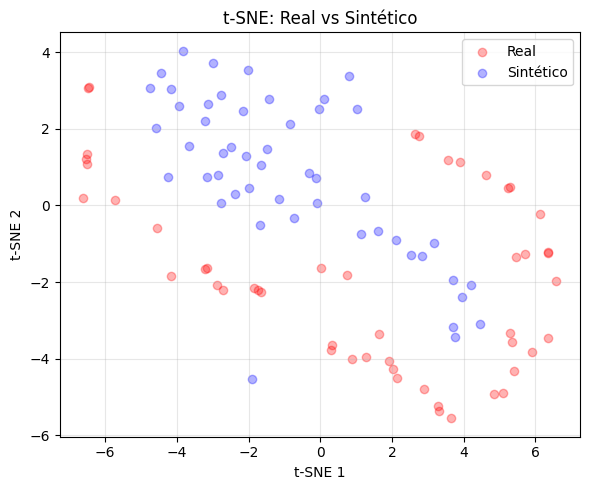

In [6]:
from generation_TGAN import safe_generation
import numpy as np

generated_data = safe_generation(model, num_samples=50, batch_size=64)

n_vis = 5000  # target

n_real = min(n_vis, len(ori_data))
n_fake = min(n_vis, len(generated_data))

idx_real = np.random.choice(len(ori_data), n_real, replace=False)
idx_fake = np.random.choice(len(generated_data), n_fake, replace=False)

ori_vis = [ori_data[i] for i in idx_real]
gen_vis = [generated_data[i] for i in idx_fake]

from visualization_TGAN import visualization

visualization(ori_vis, gen_vis, 'pca')
visualization(ori_vis, gen_vis, 'tsne')